In [35]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for German Data Analyst roles

In [36]:
df_de_DA = df[(df["job_country"] == "Germany") & (df["job_title_short"] == "Data Analyst")]
df_de_DA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
141,Data Analyst,Data Analyst & Process Developer (m/w/d),"Mettlach, Germany",via WTRF Jobs,Full-time,False,Germany,2023-05-02 13:24:54,True,False,Germany,None,NaN,NaN,Villeroy & Boch AG Hauptverwaltung,"[typescript, html, css, javascript, angular, sap]","{'analyst_tools': ['sap'], 'programming': ['ty..."
142,Data Analyst,Data Analyst (m/f/d),"Nuremberg, Germany",via Big Country Jobs,Full-time,False,Germany,2023-01-19 14:05:05,False,False,Germany,None,NaN,NaN,Symanto,"[python, r, sql, azure, power bi, excel, power...","{'analyst_tools': ['power bi', 'excel', 'power..."
175,Data Analyst,German speaking Data Analyst,"Bremen, Germany",via BeBee,Temp work,False,Germany,2023-11-19 13:17:23,False,False,Germany,None,NaN,NaN,Hito High Professionals GmbH,"[sap, excel]","{'analyst_tools': ['sap', 'excel']}"
220,Data Analyst,Inhouse Junior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-21 14:02:06,True,False,Germany,None,NaN,NaN,NEW YORKER Group-Services International GmbH &...,[windows],{'os': ['windows']}


In [37]:
df_de_DA["job_location"] = df_de_DA["job_location"].apply(lambda location: location.replace(", Germany", ""))
df_de_DA.head()

/tmp/ipykernel_84513/2401943882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de_DA["job_location"] = df_de_DA["job_location"].apply(lambda location: location.replace(", Germany", ""))


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,Erlangen,via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
141,Data Analyst,Data Analyst & Process Developer (m/w/d),Mettlach,via WTRF Jobs,Full-time,False,Germany,2023-05-02 13:24:54,True,False,Germany,None,NaN,NaN,Villeroy & Boch AG Hauptverwaltung,"[typescript, html, css, javascript, angular, sap]","{'analyst_tools': ['sap'], 'programming': ['ty..."
142,Data Analyst,Data Analyst (m/f/d),Nuremberg,via Big Country Jobs,Full-time,False,Germany,2023-01-19 14:05:05,False,False,Germany,None,NaN,NaN,Symanto,"[python, r, sql, azure, power bi, excel, power...","{'analyst_tools': ['power bi', 'excel', 'power..."
175,Data Analyst,German speaking Data Analyst,Bremen,via BeBee,Temp work,False,Germany,2023-11-19 13:17:23,False,False,Germany,None,NaN,NaN,Hito High Professionals GmbH,"[sap, excel]","{'analyst_tools': ['sap', 'excel']}"
220,Data Analyst,Inhouse Junior Data Analyst,Berlin,via BeBee,Full-time,False,Germany,2023-11-21 14:02:06,True,False,Germany,None,NaN,NaN,NEW YORKER Group-Services International GmbH &...,[windows],{'os': ['windows']}


### Top 10 German cities with highest demands for Data Analyst roles

In [38]:
df_plot = df_de_DA["job_location"].value_counts().head(10).to_frame()
df_plot

,count
job_location,
Berlin,935
Munich,634
Germany,613
Hamburg,521
Frankfurt,388
Düsseldorf,301
Anywhere,274
Cologne,250
Stuttgart,211


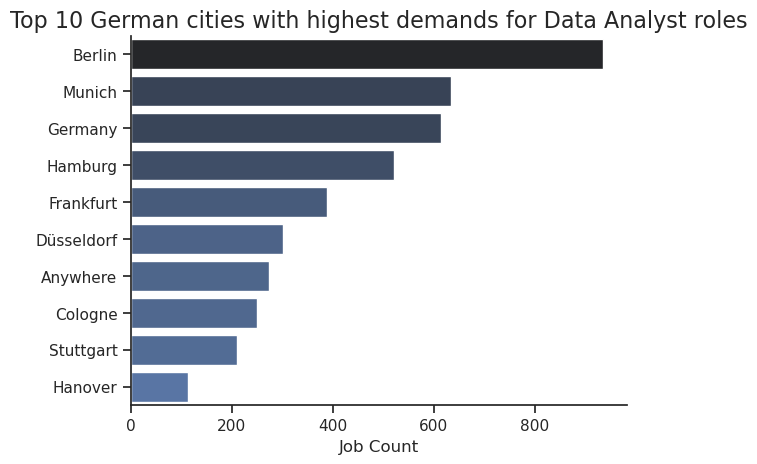

In [39]:
sns.set_theme(style="ticks")
sns.barplot(df_plot, x="count", y="job_location", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Top 10 German cities with highest demands for Data Analyst roles", fontsize=16)
plt.xlabel("Job Count")
plt.ylabel("")
plt.show()

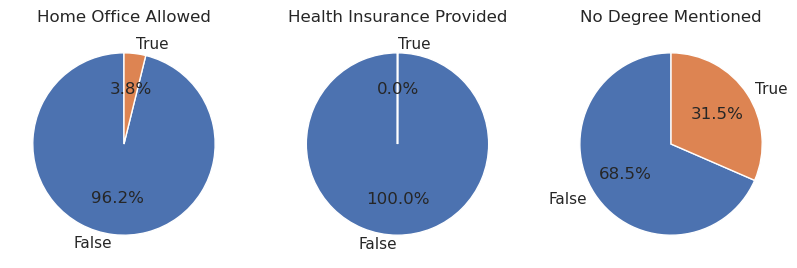

In [40]:
fig, ax = plt.subplots(1, 3)

columns = {
  "job_work_from_home":"Home Office Allowed",
  "job_health_insurance":"Health Insurance Provided",
  "job_no_degree_mention":"No Degree Mentioned"
}

for i, (key, val) in enumerate(columns.items()):
  df_conditional = df_de_DA[key].value_counts()
  ax[i].pie(df_conditional, startangle=90, autopct="%1.1f%%", labels=[False, True])
  ax[i].set_ylabel("")
  ax[i].set_title(val)
fig.set_figheight(5)
fig.set_figwidth(10)
plt.show()

### Top 10 German companies with highest demands for Data Analyst roles

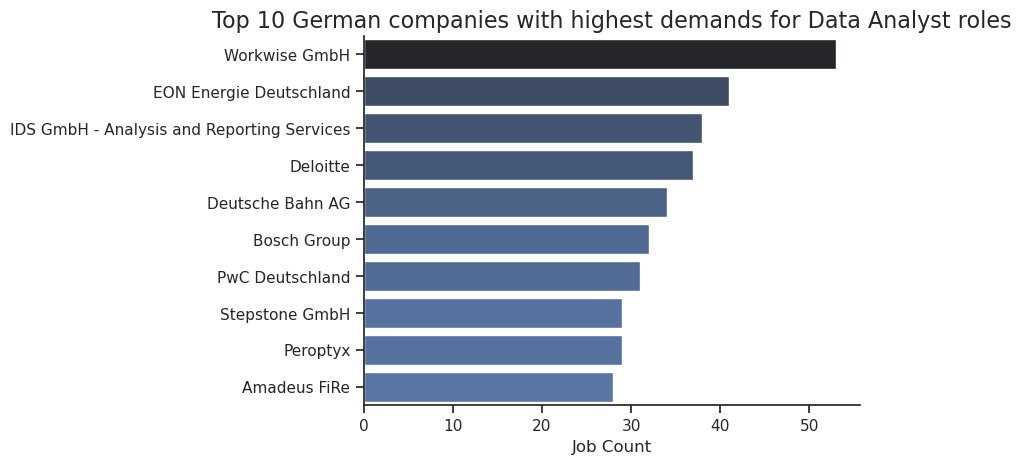

In [41]:
df_plot = df_de_DA["company_name"].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(df_plot, x="count", y="company_name", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Top 10 German companies with highest demands for Data Analyst roles", fontsize=16)
plt.xlabel("Job Count")
plt.ylabel("")
plt.show()